# **Imports**

In [2]:
# pip install keras_tuner 

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD
import keras_tuner as kt
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

# **Load Data**

In [5]:
X = pd.read_csv("sider_global_cdf_rdkit.csv")
X = X.drop("('RDKit2DNormalized_calculated', <class 'bool'>)",axis = 1)

si = SimpleImputer(missing_values=np.nan,strategy="mean")
X = si.fit_transform(X)

y = pd.read_csv("sider (1).csv")
y = y["Hepatobiliary disorders"]

# **Select 150 features and Datasets**

### **f_classif**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
f_selector = SelectKBest(score_func=f_classif, k=150)
# apply feature selection
X_bestf = f_selector.fit_transform(X, y)
print(X_bestf)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_bestf.shape)

[[9.59334934e-01 1.94494541e-03 1.62506991e-02 ... 1.00000000e+00
  1.66633397e-01 9.08980124e-02]
 [7.99683998e-01 6.90867839e-01 6.38769598e-01 ... 4.70359809e-08
  1.66633397e-01 4.56861153e-01]
 [5.33780920e-01 1.58125553e-01 2.48609841e-01 ... 4.70359809e-08
  1.66633397e-01 4.15241378e-01]
 ...
 [6.13281018e-01 3.24114962e-01 5.50193784e-01 ... 4.70359809e-08
  1.66633397e-01 4.77343497e-01]
 [3.55676446e-02 7.65522494e-01 7.46200567e-01 ... 4.70359809e-08
  1.66633397e-01 2.03074808e-01]
 [9.50010883e-01 1.47687466e-01 2.92961857e-01 ... 4.70359809e-08
  1.66633397e-01 7.76569761e-01]]
Original number of features: (1427, 200)
Reduced number of features: (1427, 150)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [163] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_bestf, y, test_size = 0.1, random_state = 1)

### **chi2**

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(score_func=chi2, k=150)
X_bestchi2 = chi2_selector.fit_transform(X, y)
print(X_bestchi2)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_bestchi2.shape)

[[9.59334934e-01 1.94494541e-03 1.62506991e-02 ... 1.00000000e+00
  1.66633397e-01 9.08980124e-02]
 [7.99683998e-01 6.90867839e-01 6.38769598e-01 ... 4.70359809e-08
  1.66633397e-01 4.56861153e-01]
 [5.33780920e-01 1.58125553e-01 2.48609841e-01 ... 4.70359809e-08
  1.66633397e-01 4.15241378e-01]
 ...
 [6.13281018e-01 3.24114962e-01 5.50193784e-01 ... 4.70359809e-08
  1.66633397e-01 4.77343497e-01]
 [3.55676446e-02 7.65522494e-01 7.46200567e-01 ... 4.70359809e-08
  1.66633397e-01 2.03074808e-01]
 [9.50010883e-01 1.47687466e-01 2.92961857e-01 ... 4.70359809e-08
  1.66633397e-01 7.76569761e-01]]
Original number of features: (1427, 200)
Reduced number of features: (1427, 150)


In [7]:
X_train_ch, X_val_ch, y_train_ch, y_val_ch = train_test_split(X_bestchi2, y, test_size = 0.1, random_state = 1)

### **mutual_info_classif**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
mi_selector= SelectKBest(score_func=mutual_info_classif, k=150)
X_bestmi=mi_selector.fit_transform(X,y)
print(X_bestmi)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_bestmi.shape)

[[9.59334934e-01 1.94494541e-03 1.62506991e-02 ... 2.32414994e-16
  1.66633397e-01 9.08980124e-02]
 [7.99683998e-01 6.90867839e-01 6.38769598e-01 ... 2.32414994e-16
  1.66633397e-01 4.56861153e-01]
 [5.33780920e-01 1.58125553e-01 2.48609841e-01 ... 2.32414994e-16
  1.66633397e-01 4.15241378e-01]
 ...
 [6.13281018e-01 3.24114962e-01 5.50193784e-01 ... 2.32414994e-16
  1.66633397e-01 4.77343497e-01]
 [3.55676446e-02 7.65522494e-01 7.46200567e-01 ... 2.32414994e-16
  1.66633397e-01 2.03074808e-01]
 [9.50010883e-01 1.47687466e-01 2.92961857e-01 ... 2.32414994e-16
  1.66633397e-01 7.76569761e-01]]
Original number of features: (1427, 200)
Reduced number of features: (1427, 150)


In [ ]:
X_train_mi, X_val_mi, y_train_mi, y_val_mi= train_test_split(X_bestmi, y, test_size = 0.1, random_state = 1)

# **KT**

## **1 hidden layer**

### **Create Model for Keras Tuner**

In [10]:
# 1 hidden layer
def create_model_for_KT(hp):

    model = Sequential()
    
    model.add(
        Dense(
            units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
            input_shape = [150],
        )
    )


    if hp.Boolean("dropout_1"):
        model.add(Dropout(rate = 0.2))

    # model.add(
    #     Dense(
    #         units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
    #         activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
    #     )
    # )

    # if hp.Boolean("dropout_2"):
    #     model.add(Dropout(rate = 0.2))
    
    
    model.add(Dense(1, activation="sigmoid"))

    # learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

    model.compile(
        optimizer = SGD(),
        loss = "binary_crossentropy",
        metrics = ["accuracy"],
    )

    return model

### **Keras Tuner**

#### **f_classif**

In [ ]:
# 1 hidden layer
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network",
)

tuner.search(X_train_f, y_train_f, epochs = 50, validation_data = (X_val_f, y_val_f))

Trial 50 Complete [00h 00m 10s]
val_accuracy: 0.7132866978645325

Best val_accuracy So Far: 0.7552447319030762
Total elapsed time: 00h 08m 32s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 260
activation_1: relu
dropout_1: True
Score: 0.7552447319030762


#### **chi2**

In [ ]:
# 1 hidden layer
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network",
)

tuner.search(X_train_ch, y_train_ch, epochs = 50, validation_data = (X_val_ch, y_val_ch))

Trial 50 Complete [00h 00m 07s]
val_accuracy: 0.7062937021255493

Best val_accuracy So Far: 0.7272727489471436
Total elapsed time: 00h 08m 41s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 460
activation_1: relu
dropout_1: True
Score: 0.7272727489471436


#### **mutual_info_classif**

In [ ]:
# 1 hidden layer
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network",
)

tuner.search(X_train_mi, y_train_mi, epochs = 50, validation_data = (X_val_mi, y_val_mi))

Trial 50 Complete [00h 00m 10s]
val_accuracy: 0.692307710647583

Best val_accuracy So Far: 0.7202796936035156
Total elapsed time: 00h 08m 29s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 360
activation_1: relu
dropout_1: True
Score: 0.7202796936035156


### **define final model model for KT**

#### **f_classif**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(260, activation = 'relu', input_shape = [150]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer ="SGD", metrics = ["accuracy"])

    return model

Epoch 1/50
41/41 [==============================] - 1s 10ms/step - loss: 0.6826 - accuracy: 0.5413 - val_loss: 0.6774 - val_accuracy: 0.5664
Epoch 2/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5709 - val_loss: 0.6686 - val_accuracy: 0.6084
Epoch 3/50
41/41 [==============================] - 0s 5ms/step - loss: 0.6755 - accuracy: 0.5818 - val_loss: 0.6630 - val_accuracy: 0.6224
Epoch 4/50
41/41 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.6051 - val_loss: 0.6558 - val_accuracy: 0.6434
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.6269 - val_loss: 0.6511 - val_accuracy: 0.6573
Epoch 6/50
41/41 [==============================] - 0s 9ms/step - loss: 0.6568 - accuracy: 0.6215 - val_loss: 0.6478 - val_accuracy: 0.6503
Epoch 7/50
41/41 [==============================] - 0s 7ms/step - loss: 0.6567 - accuracy: 0.6231 - val_loss: 0.6422 - val_accuracy: 0.7203
Epoch 8/50
41/41 [=

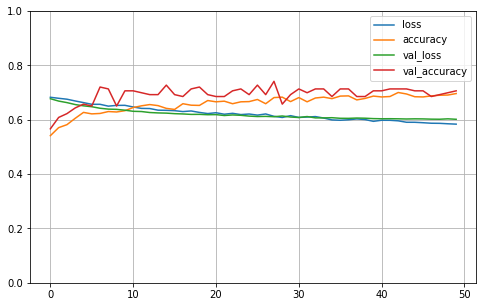

In [ ]:
KT_model_f1 = create_final_model_for_KT()

history = KT_model_f1.fit(X_train_f, y_train_f, epochs = 50, validation_data=(X_val_f,y_val_f))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_f1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 260)               39260     
                                                                 
 dropout_2 (Dropout)         (None, 260)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 261       
                                                                 
Total params: 39,521
Trainable params: 39,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_f1.save("my_KT_model_f1")
# KT_model_f1= keras.models.load_model("my_KT_model_f1")

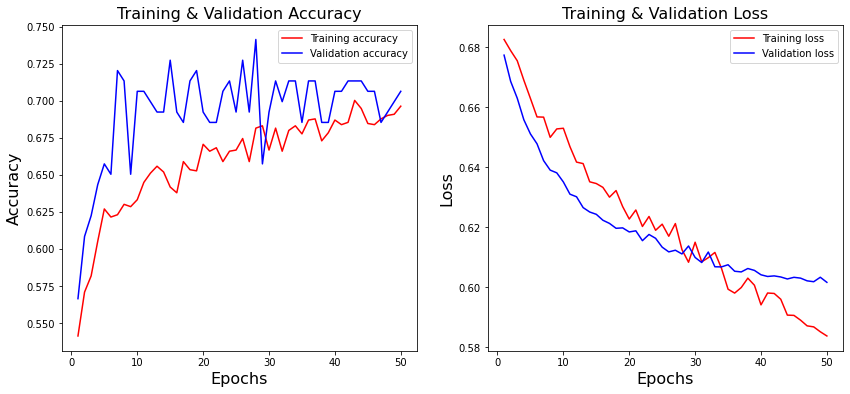

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **chi2**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [150]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer ="SGD", metrics = ["accuracy"])

    return model

Epoch 1/50
41/41 [==============================] - 1s 6ms/step - loss: 0.7056 - accuracy: 0.5055 - val_loss: 0.6995 - val_accuracy: 0.5105
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5366 - val_loss: 0.6870 - val_accuracy: 0.5524
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5896 - val_loss: 0.6809 - val_accuracy: 0.6154
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5864 - val_loss: 0.6699 - val_accuracy: 0.6084
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6051 - val_loss: 0.6632 - val_accuracy: 0.6084
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6106 - val_loss: 0.6605 - val_accuracy: 0.5944
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6269 - val_loss: 0.6535 - val_accuracy: 0.6503
Epoch 8/50
41/41 [==

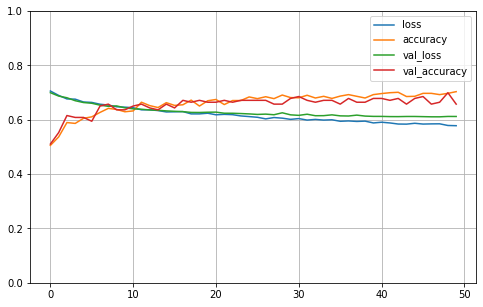

In [ ]:
KT_model_ch1 = create_final_model_for_KT()

history = KT_model_ch1.fit(X_train_ch, y_train_ch, epochs = 50, validation_data=(X_val_ch,y_val_ch))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_ch1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 460)               69460     
                                                                 
 dropout_2 (Dropout)         (None, 460)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 461       
                                                                 
Total params: 69,921
Trainable params: 69,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_ch1.save("my_KT_model_ch1")
# KT_model_ch1= keras.models.load_model("my_KT_model_ch1")

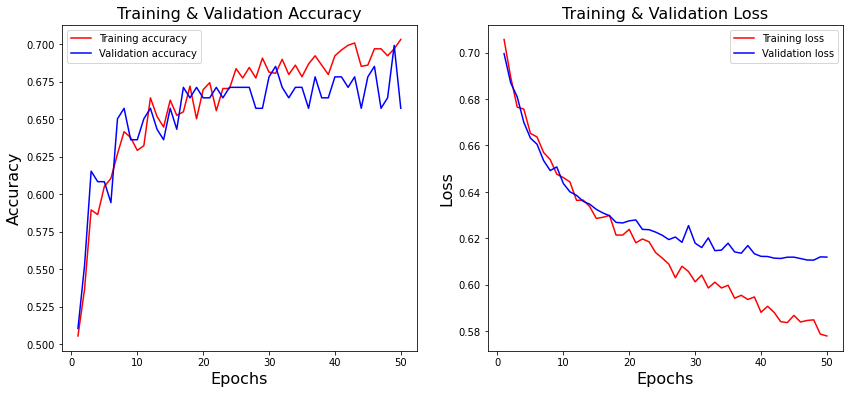

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **mutual_info_classif**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(360, activation = 'relu', input_shape = [150]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer ="SGD", metrics = ["accuracy"])

    return model

Epoch 1/100
41/41 [==============================] - 1s 6ms/step - loss: 0.7053 - accuracy: 0.4805 - val_loss: 0.6912 - val_accuracy: 0.5175
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4977 - val_loss: 0.6844 - val_accuracy: 0.5245
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5530 - val_loss: 0.6769 - val_accuracy: 0.5455
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5475 - val_loss: 0.6704 - val_accuracy: 0.5734
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.5717 - val_loss: 0.6662 - val_accuracy: 0.5664
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.5794 - val_loss: 0.6621 - val_accuracy: 0.6364
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.5981 - val_loss: 0.6575 - val_accuracy: 0.6154
Epoch 8/100
4

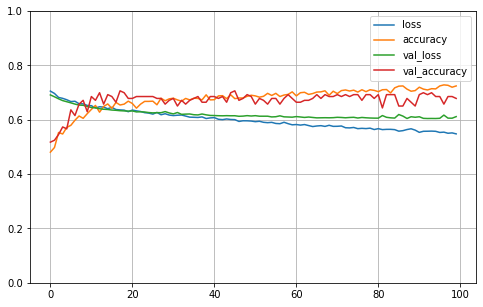

In [ ]:
KT_model_mi1 = create_final_model_for_KT()

history = KT_model_mi1.fit(X_train_mi, y_train_mi, epochs = 100, validation_data=(X_val_mi,y_val_mi))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_mi1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 360)               54360     
                                                                 
 dropout_2 (Dropout)         (None, 360)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 361       
                                                                 
Total params: 54,721
Trainable params: 54,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_mi1.save("my_KT_model_mi1")
# KT_model_mi1= keras.models.load_model("my_KT_model_mi1")

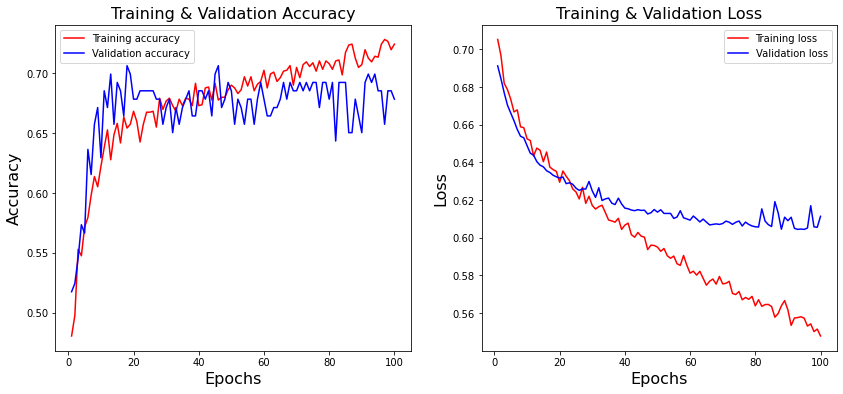

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## **2 hidden layers**

### **Create Model for Keras Tuner**

In [ ]:
# 2 hidden layers
def create_model_for_KT(hp):

    model = Sequential()
    
    model.add(
        Dense(
            units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
            input_shape = [150],
        )
    )

    if hp.Boolean("dropout_1"):
        model.add(Dropout(rate = 0.2))

    model.add(
        Dense(
            units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
        )
    )

    if hp.Boolean("dropout_2"):
        model.add(Dropout(rate = 0.2))

    
    model.add(Dense(1, activation="sigmoid"))

    # learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

    model.compile(
        optimizer = SGD(),
        loss = "binary_crossentropy",
        metrics = ["accuracy"],
    )

    return model

### **Keras Tuner**

#### **f_classif**

In [ ]:
# 2 hidden layers
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network2",
)

tuner.search(X_train_f, y_train_f, epochs = 50, validation_data = (X_val_f, y_val_f))

Trial 50 Complete [00h 00m 15s]
val_accuracy: 0.7132866978645325

Best val_accuracy So Far: 0.7412587404251099
Total elapsed time: 00h 16m 15s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network2
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 460
activation_1: relu
dropout_1: True
units_2: 460
activation_2: relu
dropout_2: True
Score: 0.7412587404251099


#### **chi2**

In [ ]:
# 2 hidden layers
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network2",
)

tuner.search(X_train_ch, y_train_ch, epochs = 50, validation_data = (X_val_ch, y_val_ch))

Trial 50 Complete [00h 00m 21s]
val_accuracy: 0.7132866978645325

Best val_accuracy So Far: 0.7342657446861267
Total elapsed time: 00h 15m 09s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network2
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 460
activation_1: relu
dropout_1: True
units_2: 160
activation_2: relu
dropout_2: False
Score: 0.7342657446861267


#### **mutual_info_classif**

In [ ]:
# 2 hidden layers
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 30,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network2",
)

tuner.search(X_train_mi, y_train_mi, epochs = 50, validation_data = (X_val_mi, y_val_mi))

Trial 30 Complete [00h 00m 41s]
val_accuracy: 0.9801223278045654

Best val_accuracy So Far: 0.9847095012664795
Total elapsed time: 00h 25m 48s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network2
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 260
activation_1: relu
dropout_1: False
units_2: 110
activation_2: relu
dropout_2: True
lr: 0.1
Score: 0.9847095012664795


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 150))
b=best_model.evaluate(X_test_mi, y_test_mi)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9684
test set loss: 0.1594637781381607 , test set accuracy : 0.9683631658554077


In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 150),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 150),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 260,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer'

### **define final model model for KT**

#### **f_classif**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [150]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(460, activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer ="SGD", metrics = ["accuracy"])

    return model

Epoch 1/50
41/41 [==============================] - 1s 10ms/step - loss: 0.6847 - accuracy: 0.5506 - val_loss: 0.6687 - val_accuracy: 0.5734
Epoch 2/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6804 - accuracy: 0.5826 - val_loss: 0.6624 - val_accuracy: 0.6084
Epoch 3/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6779 - accuracy: 0.5662 - val_loss: 0.6581 - val_accuracy: 0.6783
Epoch 4/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.5974 - val_loss: 0.6518 - val_accuracy: 0.6434
Epoch 5/50
41/41 [==============================] - 0s 7ms/step - loss: 0.6665 - accuracy: 0.6184 - val_loss: 0.6470 - val_accuracy: 0.6434
Epoch 6/50
41/41 [==============================] - 0s 7ms/step - loss: 0.6650 - accuracy: 0.6020 - val_loss: 0.6431 - val_accuracy: 0.6923
Epoch 7/50
41/41 [==============================] - 0s 7ms/step - loss: 0.6647 - accuracy: 0.6051 - val_loss: 0.6385 - val_accuracy: 0.6783
Epoch 8/50
41/41 [=

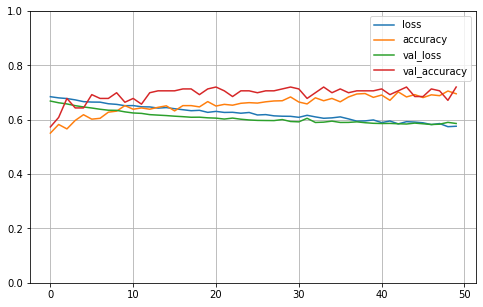

In [ ]:
KT_model_f2 = create_final_model_for_KT()

history = KT_model_f2.fit(X_train_f, y_train_f, epochs = 50, validation_data=(X_val_f,y_val_f))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_f2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 460)               69460     
                                                                 
 dropout_2 (Dropout)         (None, 460)               0         
                                                                 
 dense_4 (Dense)             (None, 460)               212060    
                                                                 
 dropout_3 (Dropout)         (None, 460)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 461       
                                                                 
Total params: 281,981
Trainable params: 281,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_f2.save("my_KT_model_f2")
# KT_model_f2= keras.models.load_model("my_KT_model_f2")

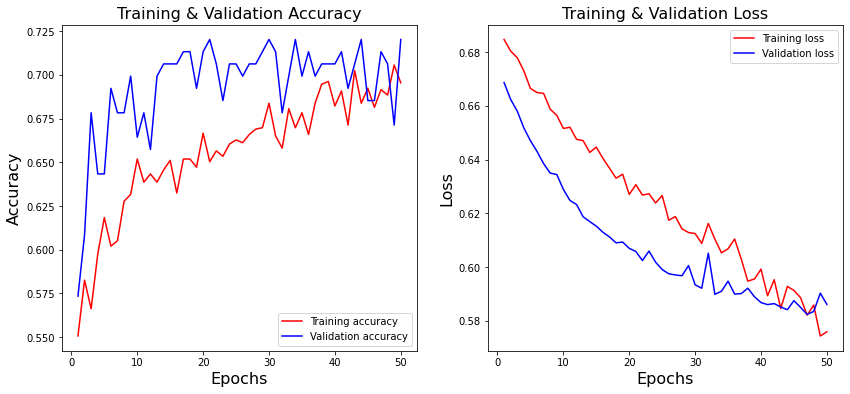

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **chi2**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(260, activation = 'relu', input_shape = [150]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(10, activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer ="SGD", metrics = ["accuracy"])

    return model

Epoch 1/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1854 - accuracy: 0.9550 - val_loss: 0.1158 - val_accuracy: 0.9572
Epoch 2/50
184/184 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.9575 - val_loss: 0.1050 - val_accuracy: 0.9572
Epoch 3/50
184/184 [==============================] - 0s 3ms/step - loss: 0.1400 - accuracy: 0.9587 - val_loss: 0.0994 - val_accuracy: 0.9587
Epoch 4/50
184/184 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.9640 - val_loss: 0.0966 - val_accuracy: 0.9664
Epoch 5/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9684 - val_loss: 0.0937 - val_accuracy: 0.9694
Epoch 6/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9684 - val_loss: 0.0920 - val_accuracy: 0.9786
Epoch 7/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9694 - val_loss: 0.0900 - val_accuracy: 0.9786
Epoch 

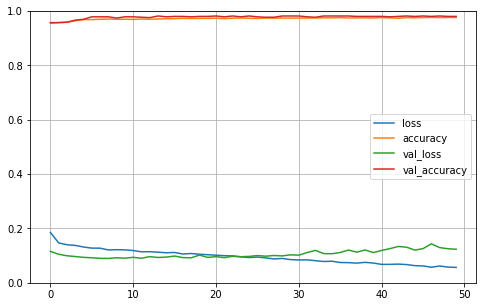

In [ ]:
KT_model_ch2 = create_final_model_for_KT()

history = KT_model_ch2.fit(X_train_ch, y_train_ch, epochs = 50, validation_data=(X_val_ch,y_val_ch))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_ch2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 260)               39260     
                                                                 
 dense_7 (Dense)             (None, 10)                2610      
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41,881
Trainable params: 41,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_ch2.save("my_KT_model_ch2")
# KT_model_ch2= keras.models.load_model("my_KT_model_ch2")

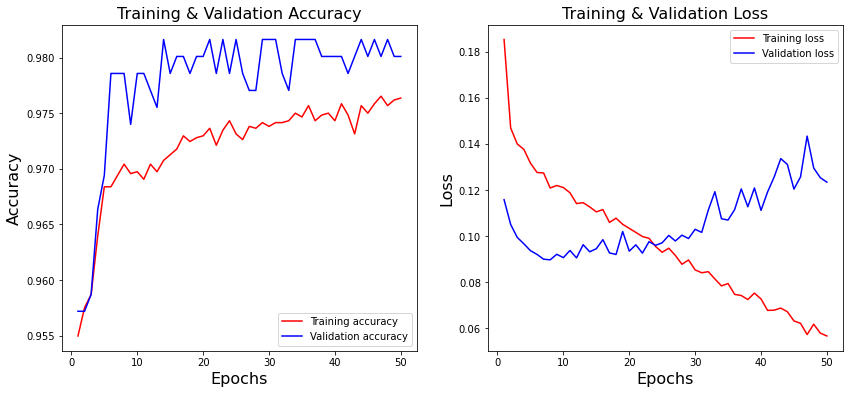

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

**BEST**

Epoch 1/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1860 - accuracy: 0.9524 - val_loss: 0.1163 - val_accuracy: 0.9572
Epoch 2/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9599 - val_loss: 0.0979 - val_accuracy: 0.9572
Epoch 3/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9679 - val_loss: 0.0938 - val_accuracy: 0.9771
Epoch 4/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9677 - val_loss: 0.0920 - val_accuracy: 0.9740
Epoch 5/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1286 - accuracy: 0.9704 - val_loss: 0.0896 - val_accuracy: 0.9740
Epoch 6/25
184/184 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9694 - val_loss: 0.0941 - val_accuracy: 0.9786
Epoch 7/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1270 - accuracy: 0.9699 - val_loss: 0.0902 - val_accuracy: 0.9801
Epoch 

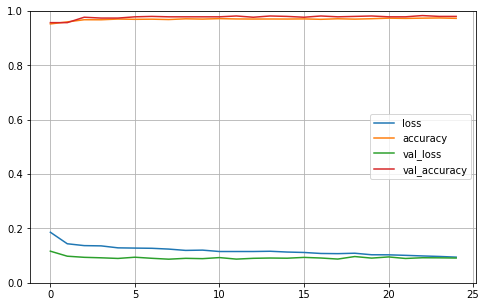

In [ ]:
KT_model_ch2best = create_final_model_for_KT()

history = KT_model_ch2best.fit(X_train_ch, y_train_ch, epochs = 25, validation_data=(X_val_ch,y_val_ch))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

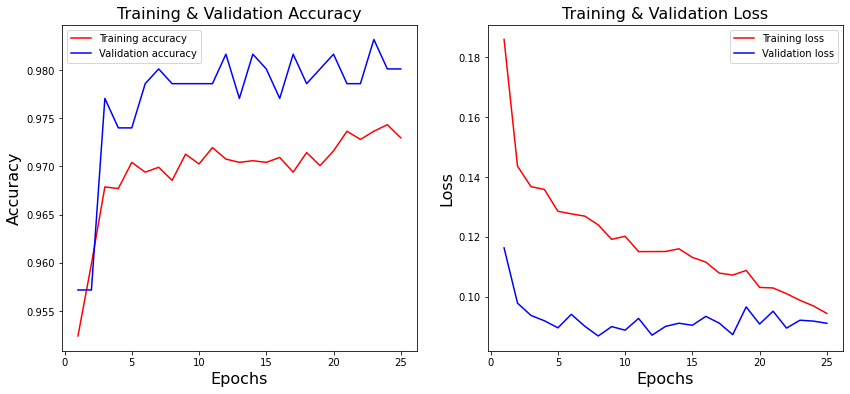

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **mutual_info_classif**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [150]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(160, activation="relu"))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer ="SGD" , metrics = ["accuracy"])

    return model

Epoch 1/50
41/41 [==============================] - 1s 15ms/step - loss: 0.6905 - accuracy: 0.5343 - val_loss: 0.6808 - val_accuracy: 0.5734
Epoch 2/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6843 - accuracy: 0.5576 - val_loss: 0.6737 - val_accuracy: 0.5524
Epoch 3/50
41/41 [==============================] - 0s 7ms/step - loss: 0.6771 - accuracy: 0.5950 - val_loss: 0.6691 - val_accuracy: 0.6084
Epoch 4/50
41/41 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.6106 - val_loss: 0.6609 - val_accuracy: 0.6084
Epoch 5/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6693 - accuracy: 0.6044 - val_loss: 0.6563 - val_accuracy: 0.5874
Epoch 6/50
41/41 [==============================] - 0s 8ms/step - loss: 0.6640 - accuracy: 0.6238 - val_loss: 0.6531 - val_accuracy: 0.6224
Epoch 7/50
41/41 [==============================] - 0s 9ms/step - loss: 0.6612 - accuracy: 0.6340 - val_loss: 0.6469 - val_accuracy: 0.6364
Epoch 8/50
41/41 [=

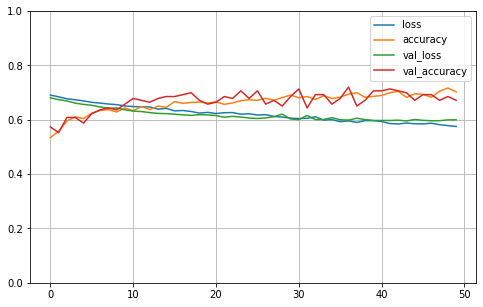

In [ ]:
KT_model_mi2 = create_final_model_for_KT()

history = KT_model_mi2.fit(X_train_mi, y_train_mi, epochs = 50, validation_data=(X_val_mi,y_val_mi))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_mi2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 460)               69460     
                                                                 
 dropout_1 (Dropout)         (None, 460)               0         
                                                                 
 dense_4 (Dense)             (None, 160)               73760     
                                                                 
 dense_5 (Dense)             (None, 1)                 161       
                                                                 
Total params: 143,381
Trainable params: 143,381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_mi2.save("my_KT_model_mi2")
# KT_model_mi2= keras.models.load_model("my_KT_model_mi2")

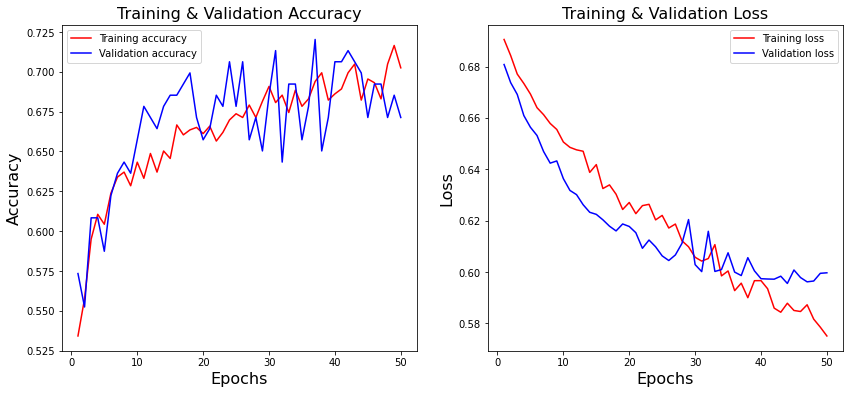

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

# **Ensemble**

## **Bagging-KT_ch1**

In [11]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [150]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer ="SGD", metrics = ["accuracy"])

    return model

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging_KT = KerasClassifier(build_fn = create_final_model_for_KT, epochs =50)
bag_clf_KTch1 = BaggingClassifier( base_estimator = model_for_bagging_KT, n_estimators=20, max_samples=len(X_train_ch) , bootstrap=True , random_state=1)
bag_clf_KTch1.fit(X_train_ch, y_train_ch)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


Epoch 1/50
41/41 [==============================] - 1s 3ms/step - loss: 0.7120 - accuracy: 0.4743
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5545
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.5896
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6308
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.6347
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6674
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.6628
Epoch 8/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6737
Epoch 9/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.6861
Epoch 10/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6931
Epoch 11/50
41/41 [

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd030aad9d0>,
                  max_samples=1284, n_estimators=20, random_state=1)

In [13]:
y_pred = bag_clf_KTch1.predict(X_val_ch)
print(f"val set accuracy :{accuracy_score(y_val_ch, y_pred)}")

val set accuracy :0.6853146853146853


**out of bag**

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging = KerasClassifier(build_fn = create_final_model_for_KT, epochs =50)
outbag_clf_KTch1 = BaggingClassifier( base_estimator = model_for_bagging, n_estimators=20, max_samples=len(X_train_ch), oob_score=True, bootstrap=True, random_state=1)
outbag_clf_KTch1.fit(X_train_ch, y_train_ch)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


41/41 [==============================] - 1s 3ms/step - loss: 0.6947 - accuracy: 0.5132
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5639
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.6012
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6355
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6433
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6760
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.6791
Epoch 8/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6172 - accuracy: 0.6854
Epoch 9/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.6885
Epoch 10/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.7118
Epoch 11/50
41/41 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd02108b850>,
                  max_samples=1284, n_estimators=20, oob_score=True,
                  random_state=1)

In [15]:
print(f"accuracy for out-of-bag : {outbag_clf_KTch1.oob_score_}")

accuracy for out-of-bag : 0.6495327102803738


In [16]:
y_pred = outbag_clf_KTch1.predict(X_val_ch)
print(f"val set accuracy : {accuracy_score(y_val_ch, y_pred)}")


val set accuracy : 0.6853146853146853


In [ ]:
outbag_clf_KTch1.oob_decision_function_

## **Bagging-KT_ch2**

In [17]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(260, activation = 'relu', input_shape = [150]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(10, activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer ="SGD", metrics = ["accuracy"])

    return model

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging_KT = KerasClassifier(build_fn = create_final_model_for_KT, epochs =50)
bag_clf_KTch2 = BaggingClassifier( base_estimator = model_for_bagging_KT, n_estimators=20, max_samples=len(X_train_ch) , bootstrap=True , random_state=1)
bag_clf_KTch2.fit(X_train_ch, y_train_ch)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


41/41 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.5273
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5841
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6090
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6301
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6503
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6597
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6698
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6667
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.6893
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6877
Epoch 11/50
41/41 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd00ace2490>,
                  max_samples=1284, n_estimators=20, random_state=1)

In [19]:
y_pred = bag_clf_KTch2.predict(X_val_ch)
print(f"val set accuracy :{accuracy_score(y_val_ch, y_pred)}")

val set accuracy :0.6783216783216783


**out of bag**

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_for_bagging = KerasClassifier(build_fn = create_final_model_for_KT, epochs =50)
outbag_clf_KTch2 = BaggingClassifier( base_estimator = model_for_bagging, n_estimators=20, max_samples=len(X_train_ch), oob_score=True, bootstrap=True, random_state=1)
outbag_clf_KTch2.fit(X_train_ch, y_train_ch)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


41/41 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5257
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5522
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5896
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.5997
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.6488
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6347
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.6526
Epoch 8/50
41/41 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6620
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6799
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6713
Epoch 11/50
41/41 [===========

BaggingClassifier(base_estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fcff8e5e7d0>,
                  max_samples=1284, n_estimators=20, oob_score=True,
                  random_state=1)

In [21]:
print(f"accuracy for out-of-bag : {outbag_clf_KTch2.oob_score_}")

accuracy for out-of-bag : 0.6495327102803738


In [22]:
y_pred = outbag_clf_KTch2.predict(X_val_ch)
print(f"val set accuracy : {accuracy_score(y_val_ch, y_pred)}")

val set accuracy : 0.6993006993006993


In [24]:
# outbag_clf_KTch2.oob_decision_function_

# **Predict**

In [25]:
X_new = X_val_ch[:10]

y_prob_1= bag_clf_KTch1.predict(X_new)
y_prob_2= bag_clf_KTch2.predict(X_new)


In [26]:
print(y_prob_1.round(5))
print(y_prob_2.round(5))


[0 1 0 0 1 0 0 1 1 1]
[0 1 0 0 1 0 0 1 1 1]


In [27]:
seq_predictions_1 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_1))
seq_predictions_2 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_2))



print(f"real lables     : {list(y_val_ch[:10])}")
print(f"bagKT1 lables   : {(seq_predictions_1)}")
print(f"bagKT2 lables   : {(seq_predictions_2)}")




real lables     : [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
bagKT1 lables   : [0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
bagKT2 lables   : [0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
